## Mini Project III

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Cleaning

Create two separate customer segmentations (using clustering) to split them into 3-5 clusters

In [129]:
# Get data for customers

customers = pd.read_csv('../data/twm_customer.csv', delimiter=';')


In [130]:
customers.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [131]:
# remove useless columns or lots of null values
customers = customers.drop(['name_prefix', 'first_name', 'last_name', 'street_name', 'street_nbr', 'postal_code', 'state_code'], axis=1)
customers.describe()

,cust_id,income,age,years_with_bank,nbr_children,marital_status
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,1.882195
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.892051
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,1.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,1.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,2.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,2.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,4.000000


In [132]:
# Check for duplicate ids and remove them
idsUnique = len(set(customers.cust_id))
idsTotal = customers.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)



0


In [133]:
# missing data
def checkNull(data):
    """Check if data in frame is null"""
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['total', 'percent'])
    return missing_data.head(20)

missing_data = checkNull(customers)
missing_data

,total,percent
cust_id,0,0.0
income,0,0.0
age,0,0.0
years_with_bank,0,0.0
nbr_children,0,0.0
gender,0,0.0
marital_status,0,0.0
city_name,0,0.0


# Scaling

In [134]:
# drop cust_id
customers = customers.drop('cust_id', axis=1)

In [135]:
num_feats = customers.dtypes[customers.dtypes != 'object'].index.tolist()

# Scaling
from sklearn.preprocessing import StandardScaler

num_feats = customers.dtypes[customers.dtypes != 'object'].index.tolist()
scaler = StandardScaler()
scaled_customers = pd.DataFrame(scaler.fit_transform(customers[num_feats].astype(float)))

In [136]:
# add columns back

scaled_customers.columns = num_feats
scaled_customers

,income,age,years_with_bank,nbr_children,marital_status
0,0.154185,0.184312,0.408539,0.258591,0.132149
1,-0.726524,1.493070,-1.087435,-0.648298,0.132149
2,-0.188366,-0.234490,1.530520,-0.648298,-0.989614
3,1.123798,0.603115,-0.339448,-0.648298,-0.989614
4,0.983479,0.864867,1.904514,1.165479,2.375675
...,...,...,...,...,...
742,-0.357478,-0.339191,0.782533,0.258591,2.375675
743,0.164864,0.707816,0.782533,0.258591,0.132149
744,1.738064,0.393714,-1.461429,1.165479,0.132149
745,-0.343735,-0.286841,1.156526,-0.648298,0.132149


In [137]:
# export to CSV with cities
scaled_customers = pd.concat([scaled_customers, customers['city_name']], axis=1)
scaled_customers.to_csv(path_or_buf='../data/customers_cleaned.csv', sep=';', index=False)
scaled_customers

,income,age,years_with_bank,nbr_children,marital_status,city_name
0,0.154185,0.184312,0.408539,0.258591,0.132149,Las Vegas
1,-0.726524,1.493070,-1.087435,-0.648298,0.132149,Los Angeles
2,-0.188366,-0.234490,1.530520,-0.648298,-0.989614,Los Angeles
3,1.123798,0.603115,-0.339448,-0.648298,-0.989614,Los Angeles
4,0.983479,0.864867,1.904514,1.165479,2.375675,New York City
...,...,...,...,...,...,...
742,-0.357478,-0.339191,0.782533,0.258591,2.375675,Los Angeles
743,0.164864,0.707816,0.782533,0.258591,0.132149,New York City
744,1.738064,0.393714,-1.461429,1.165479,0.132149,Albuquerque
745,-0.343735,-0.286841,1.156526,-0.648298,0.132149,Birmingham


# Encoding

In [138]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   income           747 non-null    int64 
 1   age              747 non-null    int64 
 2   years_with_bank  747 non-null    int64 
 3   nbr_children     747 non-null    int64 
 4   gender           747 non-null    object
 5   marital_status   747 non-null    int64 
 6   city_name        747 non-null    object
dtypes: int64(5), object(2)
memory usage: 41.0+ KB


In [139]:
customers.head()



,income,age,years_with_bank,nbr_children,gender,marital_status,city_name
0,26150,46,5,1,M,2,Las Vegas
1,6605,71,1,0,M,2,Los Angeles
2,18548,38,8,0,F,1,Los Angeles
3,47668,54,3,0,F,1,Los Angeles
4,44554,59,9,2,F,4,New York City


In [140]:
# encode simple categorical

customers = customers.replace({
                                'gender': {'F ': 0, 'M ': 1}
                                })
customers

,income,age,years_with_bank,nbr_children,gender,marital_status,city_name
0,26150,46,5,1,1,2,Las Vegas
1,6605,71,1,0,1,2,Los Angeles
2,18548,38,8,0,0,1,Los Angeles
3,47668,54,3,0,0,1,Los Angeles
4,44554,59,9,2,0,4,New York City
...,...,...,...,...,...,...,...
742,14795,36,6,1,0,4,Los Angeles
743,26387,56,6,1,1,2,New York City
744,61300,50,0,2,1,2,Albuquerque
745,15100,37,7,0,0,2,Birmingham


In [141]:
# get dummy values for cities

dummy_states = pd.get_dummies(customers.city_name)
customers = pd.concat([scaled_customers,dummy_states], axis=1)

In [142]:
customers = customers.drop('city_name', axis=1)

In [143]:
customers.to_csv(path_or_buf='../data/customers_encoded.csv', sep=';', index=False)

In [144]:
customers

,income,age,years_with_bank,nbr_children,marital_status,Albuquerque,Anaheim,Arlington,Atlanta,Austin,...,Seattle,St Louis,St Paul,Tampa,Toledo,Tucson,Tulsa,Virginia Beach,Washington,Wichita
0,0.154185,0.184312,0.408539,0.258591,0.132149,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.726524,1.493070,-1.087435,-0.648298,0.132149,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.188366,-0.234490,1.530520,-0.648298,-0.989614,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.123798,0.603115,-0.339448,-0.648298,-0.989614,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.983479,0.864867,1.904514,1.165479,2.375675,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,-0.357478,-0.339191,0.782533,0.258591,2.375675,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
743,0.164864,0.707816,0.782533,0.258591,0.132149,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
744,1.738064,0.393714,-1.461429,1.165479,0.132149,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
745,-0.343735,-0.286841,1.156526,-0.648298,0.132149,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Let's apply PCA

PCA for income

In [145]:
# remove target variables

customers_income = customers.drop('income', axis=1)

Text(0, 0.5, 'Variance Explained')

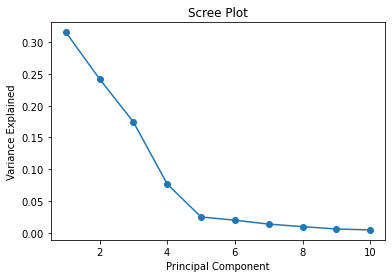

In [146]:
# Let's determine how many PCs we want

pca = PCA(n_components=10)
pca_fit = pca.fit(customers_income)
pca_fit

PC_values = np.arange(pca.n_components_) + 1
PC_values

plt.plot(PC_values, pca.explained_variance_ratio_, 'o-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

# We want 5 PCs

In [147]:
# Get the 5  PCs

pca = PCA(n_components=5)
principal_components = pd.DataFrame(pca.fit_transform(customers), columns=['PC1','PC2','PC3','PC4','PC5'])
principal_components

,PC1,PC2,PC3,PC4,PC5
0,0.385786,-0.242161,0.309979,-0.020756,0.086288
1,-0.099928,-0.447434,-1.775140,-0.788109,0.493787
2,-0.970333,-1.235784,1.119928,0.364981,-0.025995
3,-0.167290,-0.599895,-0.775338,1.437790,0.314346
4,2.980300,-0.971706,1.218973,-0.674008,-0.757108
...,...,...,...,...,...
742,1.330615,0.104643,0.681654,-1.439775,-1.506133
743,0.627257,-0.801145,0.319861,-0.107274,0.294374
744,1.524308,1.191563,-0.917151,1.311525,0.608114
745,-0.427020,-0.851915,0.751517,-0.317310,-0.645948


In [148]:
# add income back in
customers_income = pd.concat([principal_components,customers['income']], axis=1)
customers_income

,PC1,PC2,PC3,PC4,PC5,income
0,0.385786,-0.242161,0.309979,-0.020756,0.086288,0.154185
1,-0.099928,-0.447434,-1.775140,-0.788109,0.493787,-0.726524
2,-0.970333,-1.235784,1.119928,0.364981,-0.025995,-0.188366
3,-0.167290,-0.599895,-0.775338,1.437790,0.314346,1.123798
4,2.980300,-0.971706,1.218973,-0.674008,-0.757108,0.983479
...,...,...,...,...,...,...
742,1.330615,0.104643,0.681654,-1.439775,-1.506133,-0.357478
743,0.627257,-0.801145,0.319861,-0.107274,0.294374,0.164864
744,1.524308,1.191563,-0.917151,1.311525,0.608114,1.738064
745,-0.427020,-0.851915,0.751517,-0.317310,-0.645948,-0.343735


In [150]:
#export
customers_income.to_csv('../data/customers_pca_income.csv')

PCA for years at company

In [151]:
# remove target variables

customers_years = customers.drop('years_with_bank', axis=1)

Text(0, 0.5, 'Variance Explained')

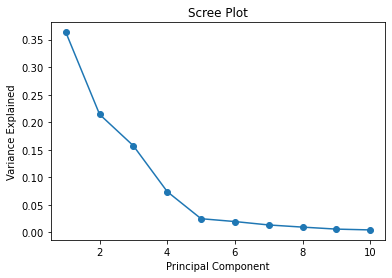

In [153]:
# Let's determine how many PCs we want

pca = PCA(n_components=10)
pca_fit = pca.fit(customers_years)
pca_fit

PC_values = np.arange(pca.n_components_) + 1
PC_values

plt.plot(PC_values, pca.explained_variance_ratio_, 'o-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

# We want 5 PCs

In [ ]:
# Get the 5  PCs

pca = PCA(n_components=5)
principal_components = pd.DataFrame(pca.fit_transform(customers), columns=['PC1','PC2','PC3','PC4','PC5'])
principal_components

In [154]:
# add years back in
customers_years = pd.concat([principal_components,customers['years_with_bank']], axis=1)
customers_years

,PC1,PC2,PC3,PC4,PC5,years_with_bank
0,0.385786,-0.242161,0.309979,-0.020756,0.086288,0.408539
1,-0.099928,-0.447434,-1.775140,-0.788109,0.493787,-1.087435
2,-0.970333,-1.235784,1.119928,0.364981,-0.025995,1.530520
3,-0.167290,-0.599895,-0.775338,1.437790,0.314346,-0.339448
4,2.980300,-0.971706,1.218973,-0.674008,-0.757108,1.904514
...,...,...,...,...,...,...
742,1.330615,0.104643,0.681654,-1.439775,-1.506133,0.782533
743,0.627257,-0.801145,0.319861,-0.107274,0.294374,0.782533
744,1.524308,1.191563,-0.917151,1.311525,0.608114,-1.461429
745,-0.427020,-0.851915,0.751517,-0.317310,-0.645948,1.156526


In [155]:
#export
customers_years.to_csv('../data/customers_pca_years.csv')